# Q1

In [95]:
from LibPython.Library import Statistics
import numpy as np
from matplotlib import pyplot as plt

In [96]:
data = np.genfromtxt("assgn2.txt")
x = data[:, 0]
y = data[:, 1]
# Added error equal to least count
yerr = 0.001*np.ones_like(y)

In [97]:
s = Statistics()
# Change according to your convenience
# func = s.chebyshev
func = s.polynomial
fitparams = s.polyfit(x, y, yerr, n=3, basis=func.__name__)

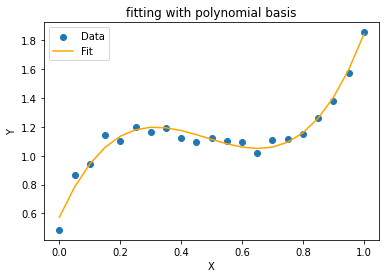

In [98]:
yfit = fitparams[0]*func(0, x) + fitparams[1]*func(1, x) + fitparams[2]*func(2, x) + fitparams[3]*func(3, x)
plt.scatter(x, y, label="Data")
plt.plot(x, yfit, label="Fit", c='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"fitting with {func.__name__} basis")
plt.legend()
plt.show()

# Q2

In [9]:
from LibPython.Library import Random
import numpy as np
rbig = Random()
rsmall = Random()

In [10]:
N = int(1e6)
small = (65, 1021)
big = (572, 16381)
randsmall = []
randbig = []
for i in range(2*N):
    randsmall.append(2*rsmall.mlcg(*small) - 1)
    randbig.append(2*rbig.mlcg(*big) - 1)
xsmall = randsmall[0:N]
ysmall = randsmall[N:2*N]
xbig = randbig[0:N]
ybig = randbig[N:2*N]

In [11]:
inpointssmall = 0
inpointsbig = 0
for i in range(N):
    if (xsmall[i]**2 + ysmall[i]**2) <= 1:
        inpointssmall += 1

for i in range(N):
    if (xbig[i]**2 + ybig[i]**2) <= 1:
        inpointsbig += 1

print(f"The pi value comes out to be {4*inpointssmall/N} for {small} and {4*inpointsbig/N} for {big}")

The pi value comes out to be 3.140844 for (65, 1021) and 3.142832 for (572, 16381)


In [12]:
r = Random()

In [13]:
def integrand(x):
    return np.sqrt(1-x**2)

In [14]:
def integration(a, b, N=int(1e6)):
    rand = []
    for i in range(N):
        rand.append((r.mlcg())*(b-a) + a)
    
    integration = 0
    for i in rand:
        integration += integrand(i)
    integration *= ((b - a) / N)

    return integration

In [15]:
print(f"The pi value comes out to be {4*integration(0, 1)}")

The pi value comes out to be 3.141619877831765


# Q3

In [87]:
from LibPython.Library import Random
import numpy as np
r = Random()

In [88]:
N = int(1e6)
rand = []
for i in range(3*N):
    rand.append(2*r.mlcg() - 1)
x = rand[0:N]
y = rand[N:2*N]
z = rand[2*N:3*N]

In [89]:
inpoints = 0
for i in range(N):
    if (x[i]**2 + y[i]**2) <=1 and (x[i]**2 + z[i]**2) <= 1:
        inpoints += 1

In [94]:
print(f"The volume of the Steinmetz solid is: {8*(inpoints/N)}")

The volume of the Steinmetz solid is: 5.30792
